In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as svm
%matplotlib inline
import pandas as pd
import csv
import numpy as np
from sklearn import preprocessing
import statistics
import sys

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ds_content= pd.read_csv('/content/drive/MyDrive/steam_games.csv')

In [ ]:
# ds_content.columns

Index(['url', 'types', 'name', 'desc_snippet', 'recent_reviews', 'all_reviews',
       'release_date', 'developer', 'publisher', 'popular_tags',
       'game_details', 'languages', 'achievements', 'genre',
       'game_description', 'mature_content', 'minimum_requirements',
       'recommended_requirements', 'original_price', 'discount_price'],
      dtype='object')

In [5]:
ds_collab = pd.read_csv('steam-200k.csv')

In [6]:
ds_collab.head(20)

,user_id,name,status,hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
5,151603712,Spore,play,14.9
6,151603712,Fallout New Vegas,purchase,1.0
7,151603712,Fallout New Vegas,play,12.1
8,151603712,Left 4 Dead 2,purchase,1.0
9,151603712,Left 4 Dead 2,play,8.9


In [7]:
ds_collab.size

800000

In [ ]:
#Preprocessing

In [8]:
ds_collab = ds_collab[ds_collab['status'] == 'play'].copy()

In [9]:
ds_collab.size

281956

In [10]:
ds_collab.head(20)

,user_id,name,status,hours
1,151603712,The Elder Scrolls V Skyrim,play,273.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9
11,151603712,HuniePop,play,8.5
13,151603712,Path of Exile,play,8.1
15,151603712,Poly Bridge,play,7.5
17,151603712,Left 4 Dead,play,3.3
19,151603712,Team Fortress 2,play,2.8


In [11]:
hours_played_each_game = pd.DataFrame(index=ds_collab['user_id'].unique(), columns=ds_collab['name'].unique())


In [30]:
hours_played_each_game

,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,...,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
151603712,273.0,87.0,14.9,12.1,8.9,8.5,8.1,7.5,3.3,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187131847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59945701,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53875128,NaN,NaN,0.5,7.5,71.0,NaN,NaN,NaN,1.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140954425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125424716,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99096740,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176449171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221315846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
hours_played_each_game['The Elder Scrolls V Skyrim'].index.values

array([151603712, 187131847,  59945701, ..., 176449171, 221315846,
       128470551], dtype=int64)

In [14]:
for i in range(len(ds_collab)):
  user_id = ds_collab.iloc[i]['user_id']
  name = ds_collab.iloc[i]['name']
  hours_played_each_game.loc[user_id,name] = ds_collab.iloc[i]['hours']

In [15]:
hours_played_each_game

,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,...,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
151603712,273.0,87.0,14.9,12.1,8.9,8.5,8.1,7.5,3.3,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187131847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59945701,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53875128,NaN,NaN,0.5,7.5,71.0,NaN,NaN,NaN,1.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140954425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125424716,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99096740,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176449171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221315846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


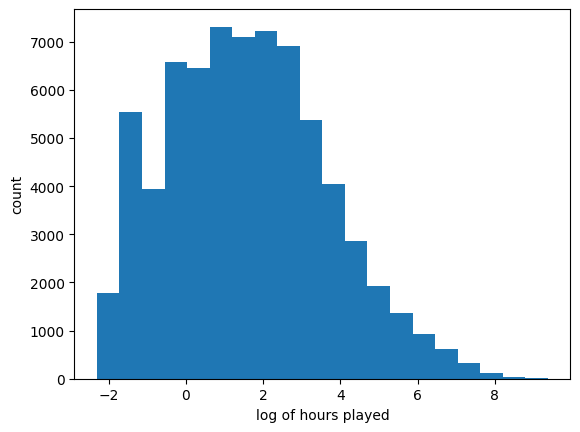

In [16]:
l = hours_played_each_game.values.flatten()
import math
h = []
for i in l:
  if math.isnan(i) == False:
    h.append(i)
plt.hist(np.log(h), bins=20)
plt.xlabel('log of hours played')
plt.ylabel('count')
plt.show()

In [17]:
hours_played_each_game.to_csv('each_game_playtime.csv')

In [6]:
each_item = pd.read_csv('each_game_playtime.csv', index_col=0)

In [7]:
each_item

,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,...,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
151603712,273.0,87.0,14.9,12.1,8.9,8.5,8.1,7.5,3.3,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187131847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59945701,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53875128,NaN,NaN,0.5,7.5,71.0,NaN,NaN,NaN,1.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140954425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125424716,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99096740,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176449171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221315846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
each_item_norm = np.log(each_item)
each_item_norm += abs(each_item_norm.min().min())
print(each_item_norm.min().min(), each_item_norm.max().max())
each_item_norm = each_item_norm[(~each_item_norm.isnull()).sum(axis=1) >= 3]
each_item_norm

0.0 11.674533980166641


,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,...,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
151603712,7.912057,6.768493,5.003946,4.795791,4.488636,4.442651,4.394449,4.317488,3.496508,3.332205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59945701,6.363028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53875128,NaN,NaN,1.609438,4.317488,6.565265,NaN,NaN,NaN,2.833213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26122540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297811211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.615121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125424716,NaN,NaN,NaN,NaN,5.521461,NaN,NaN,NaN,NaN,6.380123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99096740,6.109248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176449171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.197225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221315846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.094345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
each_item_norm = each_item_norm.fillna(0)

In [10]:
each_item_norm.columns

Index(['The Elder Scrolls V Skyrim', 'Fallout 4', 'Spore', 'Fallout New Vegas',
       'Left 4 Dead 2', 'HuniePop', 'Path of Exile', 'Poly Bridge',
       'Left 4 Dead', 'Team Fortress 2',
       ...
       'Adventure Time  Explore the Dungeon Because I DONT KNOW!',
       'Ride! Carnival Tycoon', 'SAMURAI WARRIORS 4-II', 'The Bug Butcher',
       'Romance of the Three Kingdoms Maker', 'Space Colony', 'Life is Hard',
       'Executive Assault', 'O.R.B.', 'MirrorMoon EP'],
      dtype='object', length=3600)

In [11]:
each_item_norm

,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,...,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
151603712,7.912057,6.768493,5.003946,4.795791,4.488636,4.442651,4.394449,4.317488,3.496508,3.332205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59945701,6.363028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53875128,0.000000,0.000000,1.609438,4.317488,6.565265,0.000000,0.000000,0.000000,2.833213,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26122540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297811211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.615121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125424716,0.000000,0.000000,0.000000,0.000000,5.521461,0.000000,0.000000,0.000000,0.000000,6.380123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99096740,6.109248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176449171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221315846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.094345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
slice_ds = each_item_norm[0:200]
slice_ds

,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,...,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
151603712,7.912057,6.768493,5.003946,4.795791,4.488636,4.442651,4.394449,4.317488,3.496508,3.332205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59945701,6.363028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53875128,0.000000,0.000000,1.609438,4.317488,6.565265,0.000000,0.000000,0.000000,2.833213,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26122540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297811211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.615121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121280370,0.000000,0.000000,0.000000,7.319865,2.995732,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219466905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126098408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127813787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
np_df = each_item_norm.to_numpy()

In [14]:
user_id = each_item_norm.index.to_numpy()

In [15]:
np_df

array([[7.91205689, 6.76849321, 5.00394631, ..., 0.        , 0.        ,
        0.        ],
       [6.3630281 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.60943791, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [41]:
feature_arr = []
for i in np_df:
  d = list(i[0:len(i)-1])
  p = [int(j) for j in d]
  feature_arr.append(p)

In [12]:
user_id

array([151603712,  59945701,  53875128, ..., 176449171, 221315846,
       128470551], dtype=int64)

In [16]:
from sklearn.metrics import mean_squared_error
class ExplicitMF:
    """
    Train a matrix factorization model using Alternating Least Squares
    to predict empty entries in a matrix
    
    Parameters
    ----------
    n_iters : int
        number of iterations to train the algorithm
        
    n_factors : int
        number of latent factors to use in matrix 
        factorization model, some machine-learning libraries
        denote this as rank
        
    reg : float
        regularization term for item/user latent factors,
        since lambda is a keyword in python we use reg instead
    """

    def __init__(self, n_iters, n_factors, reg):
        self.reg = reg
        self.n_iters = n_iters
        self.n_factors = n_factors  
        
    def fit(self, train):
        """
        pass in training and testing at the same time to record
        model convergence, assuming both dataset is in the form
        of User x Item matrix with cells as ratings
        """
        self.n_user, self.n_item = train.shape
        self.user_factors = np.random.random((self.n_user, self.n_factors))
        self.item_factors = np.random.random((self.n_item, self.n_factors))

        self.train_mse_record = []   
        for _ in range(self.n_iters):
            self.user_factors = self._als_step(train, self.user_factors, self.item_factors)
            self.item_factors = self._als_step(train.T, self.item_factors, self.user_factors) 
            predictions = self.predict()
            train_mse = self.compute_mse(train, predictions)
            self.train_mse_record.append(train_mse)
        
        return self    
    
    def _als_step(self, ratings, solve_vecs, fixed_vecs):
        """
        when updating the user matrix,
        the item matrix is the fixed vector and vice versa
        """
        A = fixed_vecs.T.dot(fixed_vecs) + np.eye(self.n_factors) * self.reg
        b = ratings.dot(fixed_vecs)
        A_inv = np.linalg.inv(A)
        solve_vecs = b.dot(A_inv)
        return solve_vecs
    
    def predict(self):
        """predict ratings for every user and item"""
        pred = self.user_factors.dot(self.item_factors.T)
        return pred
    
    @staticmethod
    def compute_mse(y_true, y_pred):
        """ignore zero terms prior to comparing the mse"""
        mask = np.nonzero(y_true)
        mse = mean_squared_error(y_true[mask], y_pred[mask])
        return mse

In [17]:
def plot_learning_curve(model):
    """visualize the training/testing loss"""
    linewidth = 3
    plt.plot(model.train_mse_record, label = 'Train', linewidth = linewidth)
    plt.xlabel('iterations')
    plt.ylabel('MSE')
    plt.legend(loc = 'best')
    plt.show()

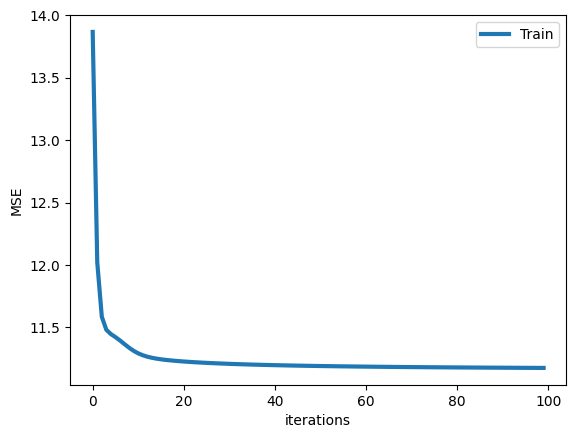

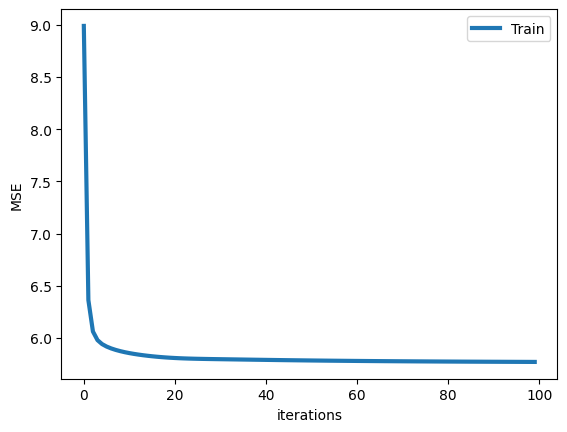

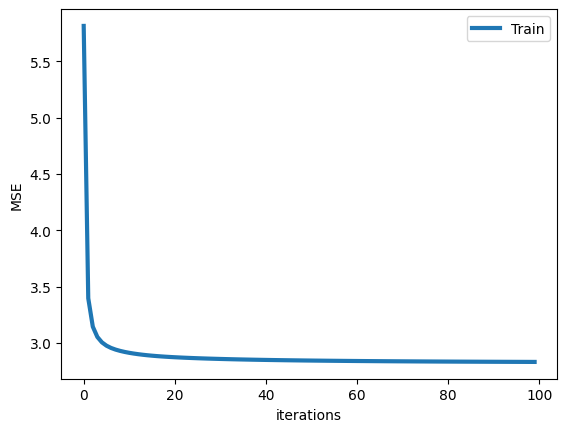

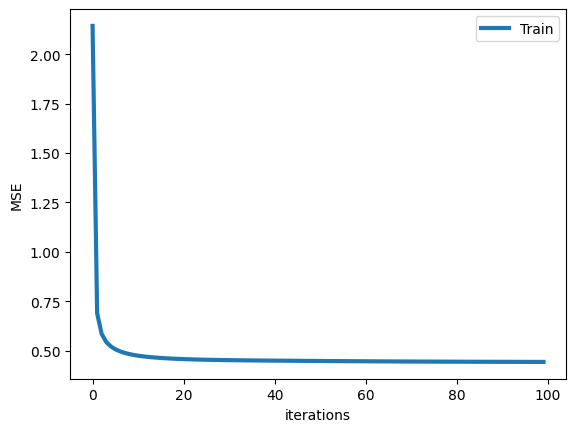

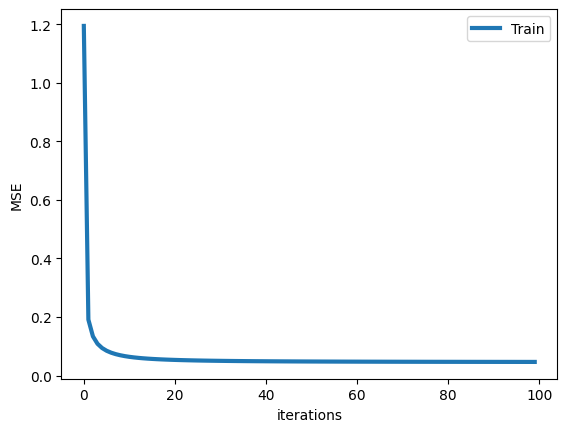

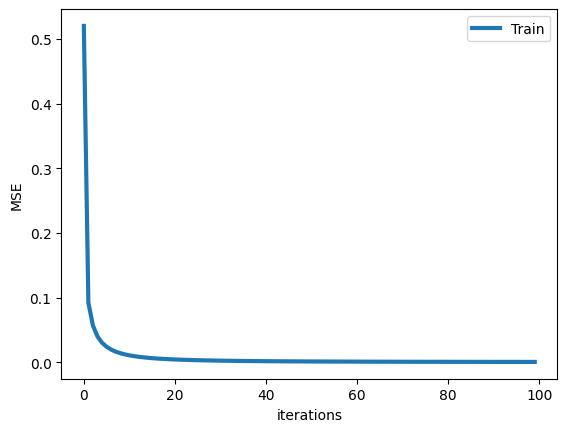

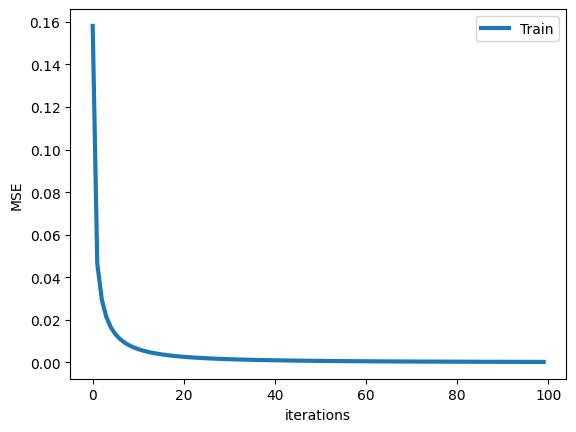

In [18]:
als_min_history = []
for i in [5,20,40,100,150,250,500]:
  als = ExplicitMF(n_iters = 100, n_factors = i, reg = 0.01)
  als.fit(slice_ds.to_numpy())
  plot_learning_curve(als)
  als_min_history.append(min(als.train_mse_record))

Text(0, 0.5, 'MSE')

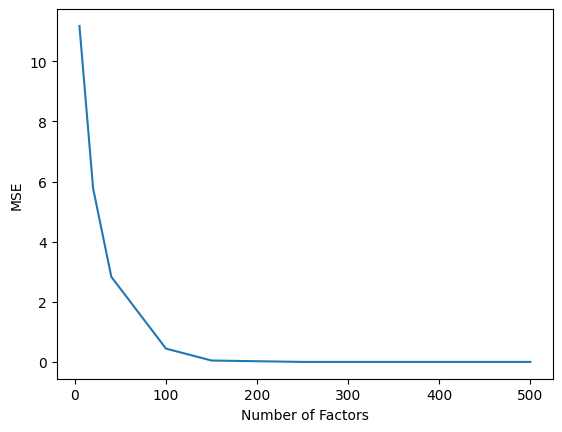

In [19]:
plt.plot([5,20,40,100,150,250,500], als_min_history)
plt.xlabel('Number of Factors')
plt.ylabel('MSE')

In [20]:
md = ExplicitMF(n_iters = 100, n_factors = 25, reg = 0.01)
md.fit(slice_ds.to_numpy())

In [21]:
lf_prod = np.matmul(md.user_factors, md.item_factors.T)

In [22]:
ubyi_mf = pd.DataFrame(lf_prod, index=slice_ds.index.values, columns=slice_ds.columns.values)
ubyi_mf

,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,...,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
151603712,6.996008,1.396476,0.317519,1.260418,1.853022,0.443226,0.448220,0.276892,0.919012,3.540586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59945701,6.138324,0.835929,0.202408,1.149181,0.504307,0.291116,0.332037,0.169825,0.351321,0.642507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53875128,0.138771,-0.356393,1.534193,4.677869,7.083353,-0.038185,-0.031185,-0.009116,2.700003,-0.533746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26122540,0.227550,0.300064,-0.039453,0.105969,0.511377,-0.085732,-0.177555,-0.027586,0.394648,-0.196587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297811211,0.596383,0.105791,0.048373,0.017200,0.707510,0.246870,-0.019459,0.049483,0.068439,3.674633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121280370,0.284866,0.906131,0.076899,2.147661,1.540366,0.132302,-0.448019,0.010333,0.032196,2.221150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219466905,-0.182021,-0.009110,-0.002538,-0.125661,-0.074595,0.000855,-0.004882,-0.003613,-0.010463,0.434148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126098408,-0.134861,-0.200978,-0.073954,0.517687,0.095120,-0.111597,0.256101,-0.070023,-0.544099,0.440398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127813787,-0.017142,-0.008079,-0.003247,-0.006811,-0.024816,-0.003432,0.005314,-0.001963,-0.009620,-0.004755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
ubyi_mf.loc[151603712].values

array([6.99600815, 1.39647643, 0.31751858, ..., 0.        , 0.        ,
       0.        ])

In [24]:
#construct user correlation matrix
user_corr = pd.DataFrame(index=ubyi_mf.index.values, 
                         columns=ubyi_mf.index.values)

In [26]:
i = 0
for user1 in user_corr.index.values:
  #progress indicator
  i+=1
  # print(i)
  # print("for-",user1)
  for user2 in user_corr.columns.values:
    if user1 == user2:
      continue
    # print()
    a = ubyi_mf.loc[user1].values
    b = ubyi_mf.loc[user2].values

    corr = np.corrcoef(a,b)[0,1]
    user_corr.loc[user1,user2] = corr
    user_corr.loc[user2,user1] = corr

In [27]:
user_corr

,151603712,59945701,53875128,26122540,297811211,218323237,126340495,97298878,173909336,92107940,...,1950243,110095045,62985928,182220992,43913966,121280370,219466905,126098408,127813787,120725727
151603712,NaN,0.657289,0.134468,0.065098,0.409364,0.165211,0.237872,0.451901,-0.010755,0.704833,...,0.287714,0.417241,0.036253,-0.019797,0.195005,0.337612,0.066156,-0.003305,-0.166686,0.218559
59945701,0.657289,NaN,0.121196,-0.062639,0.026206,-0.00058,0.241521,0.166205,0.155817,0.654171,...,0.28981,0.059779,-0.0542,0.289564,0.142484,0.124477,-0.160049,0.354936,-0.306178,0.219018
53875128,0.134468,0.121196,NaN,-0.008872,-0.016652,-0.010823,0.049118,0.265385,0.02783,0.117215,...,0.123495,-0.026089,-0.055414,0.061538,0.115974,0.295481,-0.005671,0.170984,-0.090777,0.044002
26122540,0.065098,-0.062639,-0.008872,NaN,-0.077352,0.019924,0.195226,-0.078708,-0.107123,0.025987,...,0.218028,-0.030998,-0.064997,-0.058574,-0.014958,0.06911,0.006086,-0.013785,0.006408,0.003354
297811211,0.409364,0.026206,-0.016652,-0.077352,NaN,0.023051,0.28148,0.457219,0.045334,0.336255,...,0.299746,0.885596,-0.099883,-0.045751,0.379749,0.396705,0.366524,-0.06753,0.104629,0.046894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121280370,0.337612,0.124477,0.295481,0.06911,0.396705,0.338102,0.372768,0.393945,-0.160201,0.188582,...,0.140158,0.258139,0.037166,-0.106812,0.386442,NaN,0.125567,0.037599,-0.165938,0.248659
219466905,0.066156,-0.160049,-0.005671,0.006086,0.366524,0.539248,0.355276,0.413538,0.566459,-0.02527,...,0.294231,0.251801,0.004657,0.036012,-0.031489,0.125567,NaN,-0.109385,0.419519,0.332942
126098408,-0.003305,0.354936,0.170984,-0.013785,-0.06753,0.030199,0.487479,0.144704,0.013604,0.065695,...,0.270249,0.050294,-0.073872,0.757948,0.052743,0.037599,-0.109385,NaN,0.068336,0.495316
127813787,-0.166686,-0.306178,-0.090777,0.006408,0.104629,0.089496,0.123027,-0.112832,0.243981,0.069425,...,-0.027671,-0.045608,-0.12015,-0.100236,0.040285,-0.165938,0.419519,0.068336,NaN,0.006964


In [28]:
# m = list(user_corr.loc[151603712].values)
# m.sort()
# m = m[::-1]
# # d = user_corr.loc[151603712][for i in list(user_corr.loc[151603712].values): in m]
# d = list(user_corr.loc[151603712].values)
# d
# # print(m)
def similar_set(user):
    max = list(user_corr.loc[user].values)
    max.sort()
    max = max[::-1]
    d = user_corr.loc[user][user_corr.loc[user].values > max[5]].index.values
    print("Users similar with -",user," are ",d)
    


In [29]:
similar_set(151603712)

Users similar with - 151603712  are  [180789959 162649407 130201800  71082079  77905942]


C:\Users\DELL\AppData\Local\Temp\ipykernel_8304\293376445.py:12: RuntimeWarning: invalid value encountered in greater
  d = user_corr.loc[user][user_corr.loc[user].values > max[5]].index.values


In [73]:
def recommend_a_game3(user):
  games_to_consider = slice_ds.loc[user][slice_ds.loc[user].values > 0].index.values
  print(games_to_consider)
  print('We recommend:')
  top5 = ubyi_mf.loc[1, games_to_consider].sort_values(ascending=False)[:5].index.values
  print(top5)
  for idx, game in enumerate(top5):
    print('{0}: {1}'.format(idx+1, game))


In [83]:
# games_to_consider = slice_ds.loc[151603712][slice_ds.loc[151603712].values > 0].index.values
# top5 = ubyi_mf.loc.
# print(top5)
recommend_a_game3(0)

KeyError: 0

In [ ]:
each_items = pd.read_csv('/content/each_game_playtime.csv', index_col=0)
each_item_norms = np.log(each_items)
each_item_norms += abs(each_item_norms.min().min())
print(each_item_norms.min().min(), each_item_norms.max().max())
each_item_norms = each_item_norms[(~each_item_norms.isnull()).sum(axis=1) >= 3]
each_item_norms

0.0 11.674533980166641


,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,...,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
151603712,7.912057,6.768493,5.003946,4.795791,4.488636,4.442651,4.394449,4.317488,3.496508,3.332205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59945701,6.363028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53875128,NaN,NaN,1.609438,4.317488,6.565265,NaN,NaN,NaN,2.833213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26122540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297811211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.615121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125424716,NaN,NaN,NaN,NaN,5.521461,NaN,NaN,NaN,NaN,6.380123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99096740,6.109248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176449171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.197225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221315846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.094345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
collab_recommend(1)

KeyError: ignored

In [ ]:
R = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])
R = np.array(feature_arr)

mf = ExplicitMF(50,40,0.01)

In [ ]:
feature_arr[0]

[<generator object <genexpr> at 0x7fbd1bdcccf0>]

In [ ]:
mf.fit(each_item_norm.to_numpy())

TypeError: ignored

In [ ]:
mf.full_matrix()

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
corr_matrix_users = pd.DataFrame(index=each_item_norm.index.values, 
                         columns=each_item_norm.index.values)

In [ ]:
corr_matrix_users

,0,2,3,5,11,13,15,26,27,31,...,11334,11339,11340,11341,11342,11345,11346,11347,11348,11349
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


nan

In [ ]:
for userA in corr_matrix_users.index.values:
  for userB in corr_matrix_users.columns.values:
    if userA == userB or (not np.isnan(corr_matrix_users.loc[userA, userB])):
      continue
    a = corr_matrix_users.loc[userA].values
    b = corr_matrix_users.loc[userB].values
    x = []
    y = []
    for i in range(len(a)):
      if np.isnan(float(str(a[i]))) or np.isnan(float(str(b[i]))):
        continue
      x.append(a[i])
      y.append(b[i])
    if(len(x) >= 3):
      corr = np.corrcoef(x,y)
      corr_matrix_users.loc[userA,userB] = corr
      corr_matrix_users.loc[userB,userA] = corr


KeyboardInterrupt: ignored